In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Tipo hospitalaria
## Creacion de factores de demanda
Usando los datos recopilados a partir de los reportes rem, crearemos indicadores de necesidad que nos ayuden a priorizar la cercania de centros de salud a aquellas personas con mayor demanda

In [18]:
data = pd.read_csv('atenciones_edad_tipo.csv', sep = ';',thousands = '.')
data.rename({'Año':'Anio','Atencion':'Tipo'}, axis = 1, inplace = True)
data

,Anio,Tipo,Edad<5,Edad5-14,Edad15-64,Edad>64,Total
0,2017,Hospital,1736226,1911618,8285485,3233675,15167004
1,2017,Urgencias,2122593,2340814,9195550,1924431,15583388
2,2017,Rutinario,2397468,1612460,8901976,3326085,16237989
3,2018,Hospital,1767632,1970269,8840767,3637381,16216049
4,2018,Urgencias,2065487,2336438,9475969,2038986,15916880
5,2018,Rutinario,2415491,1681713,9461763,3686061,17245028
6,2019,Hospital,1771227,1995158,9041989,3799217,16607591
7,2019,Urgencias,2017747,2405752,9630389,2115197,16169085
8,2019,Rutinario,2308947,1709514,9495024,5518465,19031950
9,2020,Hospital,726403,796374,5833546,2087084,9443407


Empezaremos analizando el crecimiento de la demanda por año, para esto vemos el siguiente grafico

<Figure size 600x400 with 0 Axes>

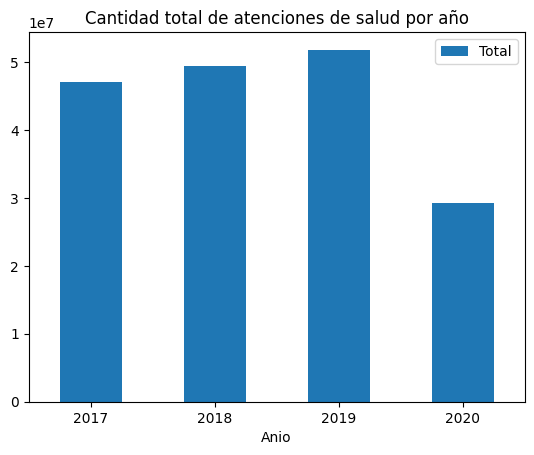

In [19]:
plt.figure(figsize = (6,4))
fig, ax = plt.subplots()
data.groupby('Anio').sum().reset_index().plot(ax = ax,x = 'Anio', 
    y = 'Total', kind ='bar', stacked = True, rot = 0,
    title = 'Cantidad total de atenciones de salud por año')
# ax.yaxis.get_major_formatter().set_scientific(False)
# ax.yaxis.get_major_formatter().set_useOffset(False)
# plt.legend(loc='lower center')
# plt.xlabel("")
plt.show()

Pdemos notar un claro aumento en el numero de atenciones anual, pero visto completamente opacado por el periodo de pandemia, dado que este dato es atipico consideraremos los periodos hasta el 2019 como validos para el analisis

In [20]:
data = data[data.Anio < 2020]

Ademas de esto vamos a observar la distribucion de atenciones por cada tipo de centro, para esto agruparemos los datos y veremos como se presentan.

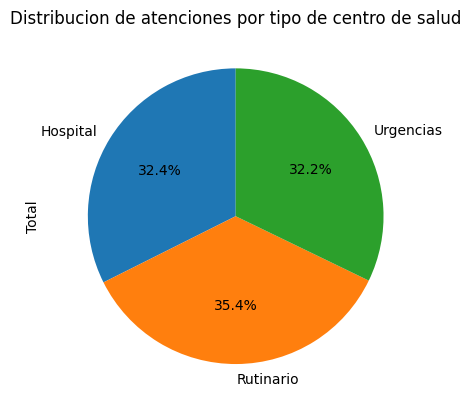

In [21]:
data.groupby(['Tipo']).Total.mean().plot(kind = 'pie',legend=False, autopct='%1.1f%%', 
    startangle=90, title = 'Distribucion de atenciones por tipo de centro de salud')
plt.show()

Podemos notar que no hay una clara predominancia entre cada tipo de atencion, agregaremos al analisis una separacion por edad para validar si existe relacion. 

<Figure size 600x400 with 0 Axes>

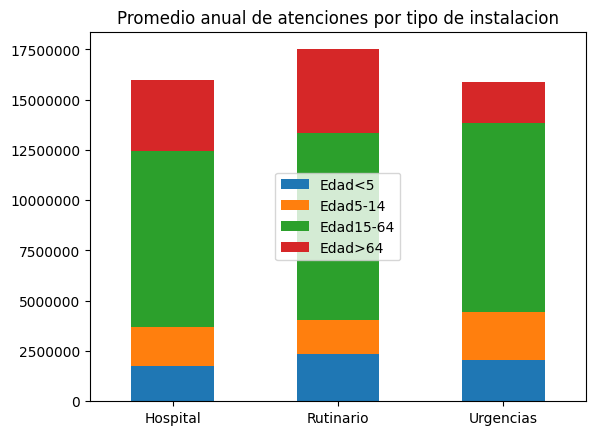

In [22]:
data2 = data.groupby('Tipo')['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64'].mean().reset_index()
plt.figure(figsize = (6,4))
fig, ax = plt.subplots()
data2.plot(ax = ax,x = 'Tipo', y = ['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64'],
           kind ='bar', stacked = True, rot = 0,
           title = 'Promedio anual de atenciones por tipo de instalacion')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.legend(loc='center')
plt.xlabel("")
plt.show()

Dada la diferencia entre la cantidad de edades contempladas en cada grupo, haremos un analisis contra la poblacion para saber la demanda por persona, para esto dividirenos las atenciones por la poblacion en cada año manteniendo la misma agrupación.

In [23]:
poblacion = pd.read_csv('poblacion_edad_2017_2020.csv', sep = ';',thousands = '.')
poblacion = poblacion[poblacion.Anio < 2020]
poblacion

,Anio,Edad<5,Edad5-14,Edad15-64,Edad>64
0,2017,1222741,2466961,12658694,2070796
1,2018,1211895,2484245,12890070,2165195
2,2019,1202176,2511996,13132822,2260222


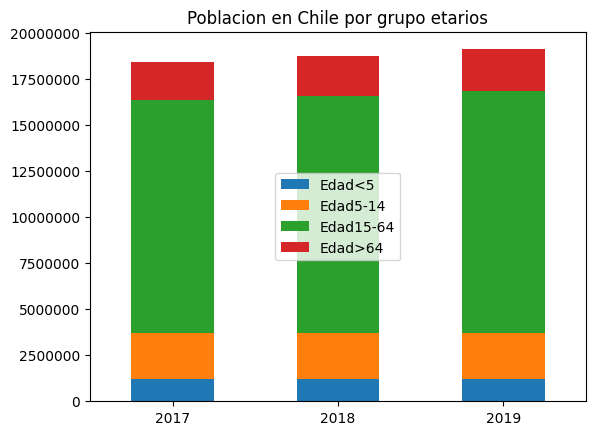

In [24]:
fig, ax = plt.subplots()
poblacion.groupby(['Anio']).mean().reset_index().plot(ax = ax,x = 'Anio', 
    y = ['Edad<5','Edad5-14','Edad15-64','Edad>64'], kind ='bar', stacked = True, rot = 0,
    title = 'Poblacion en Chile por grupo etarios')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.legend(loc='center')
plt.xlabel("")
plt.show()

In [25]:
data3 = data.copy()
for anio in data3.Anio.unique():
    for edad in ['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64']:
        data3.loc[data3.Anio == anio, edad] /=  int(poblacion.loc[poblacion.Anio == anio, edad])
data3

,Anio,Tipo,Edad<5,Edad5-14,Edad15-64,Edad>64,Total
0,2017,Hospital,1.419946,0.774888,0.654529,1.561561,15167004
1,2017,Urgencias,1.735930,0.948865,0.726422,0.929319,15583388
2,2017,Rutinario,1.960732,0.653622,0.703230,1.606187,16237989
3,2018,Hospital,1.458569,0.793106,0.685859,1.679932,16216049
4,2018,Urgencias,1.704345,0.940502,0.735137,0.941710,15916880
5,2018,Rutinario,1.993152,0.676951,0.734035,1.702415,17245028
6,2019,Hospital,1.473351,0.794252,0.688503,1.680904,16607591
7,2019,Urgencias,1.678412,0.957705,0.733307,0.935836,16169085
8,2019,Rutinario,1.920640,0.680540,0.723000,2.441559,19031950


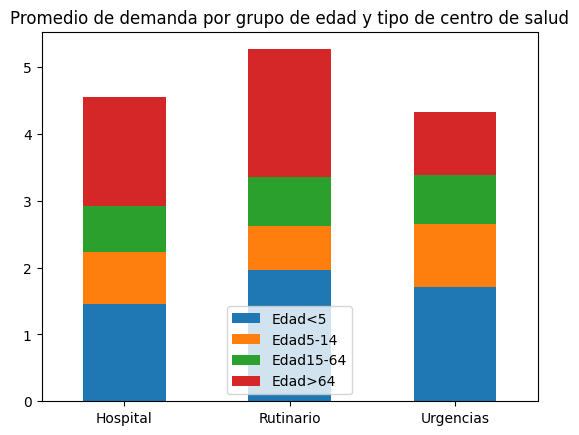

In [26]:
fig, ax = plt.subplots()
data3.groupby(['Tipo']).mean().reset_index().plot(ax = ax,x = 'Tipo', 
    y = ['Edad<5','Edad5-14','Edad15-64','Edad>64'], kind ='bar', stacked = True, rot = 0,
    title = 'Promedio de demanda por grupo de edad y tipo de centro de salud')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.legend(loc='lower center')
plt.xlabel("")
plt.show()

Con esta medicion podemos ver una demanda mas elevada por los grupos de menor edad hacia todos los centros de salud y una muy baja demanda de personas.
A su vez esto nos muestra que la demanda de cada tipo de centro de salud es similar, pero dada la cantidad de establecimientos de cada tipo, debemos hacer un ajuste para saber cuanto aporta a la demanda total cada instalacion en concreto.

Este analisis lo haremos usando las comunas que elejimos como objeto de estudio, por lo que usando los datos de establecimientos de salud tenemos los siguientes resultados.

In [27]:
salud = pd.read_csv('UbicacionSalud.csv')
salud = salud[salud.Prestador == 'Público ']
salud.Comuna = salud.Comuna.str.upper()
def tipo_establecimiento(x):
    if x in [ 'Hospital ', 'Hospital']:
        return 'Hospital'
    elif x in ['Posta de Salud Rural (PSR)','Centro Comunitario de Salud Familiar (CECOSF)',
               'Centro de Salud Familiar (CESFAM)', 'Consultorio General Urbano (CGU)',
               'Consultorio de Diagnóstico y Tratamiento (CDT)',
               'Centro de Referencia de Salud (CRS)']:
        return 'Rutinario'
    elif x in ['Servicio de Atención Primaria de Urgencia (SAPU)','Servicio de Urgencia Rural (SUR)',
               'Servicio de Atención Primaria de Urgencia de Alta Resolutividad (SAR)']:
        return 'Urgencias'
    else:
        return 'Otro'
# Quitamos del estudio todos los registros que no utilizaremos
salud['Tipo'] = salud.Tipo.apply(tipo_establecimiento)
salud=salud[salud.Tipo!= 'Otro']

In [34]:
salud[salud.Tipo == 'Hospital']

,ID,Region,Tipo,Nombre,Comuna,y,x,Prestador,Complejidad
5,106100,Región De Valparaíso,Hospital,Hospital Carlos Van Buren (Valparaíso),VALPARAÍSO,-33.050258,-71.611098,Público,Alta Complejidad
6,106102,Región De Valparaíso,Hospital,Hospital Dr. Eduardo Pereira Ramírez (Valparaíso),VALPARAÍSO,-33.056790,-71.589620,Público,Alta Complejidad
7,106103,Región De Valparaíso,Hospital,Hospital Claudio Vicuña ( San Antonio),SAN ANTONIO,-33.588809,-71.608623,Público,Alta Complejidad
8,106104,Región De Valparaíso,Hospital,Hospital Siquíatrico del Salvador,VALPARAÍSO,-33.021285,-71.642513,Público,Mediana Complejidad
76,107100,Región De Valparaíso,Hospital,Hospital Dr. Gustavo Fricke (Viña del Mar),VIÑA DEL MAR,-33.029400,-71.541725,Público,Alta Complejidad


In [32]:
salud.groupby(['Comuna', 'Tipo'] ).Tipo.count()

Comuna        Tipo     
SAN ANTONIO   Hospital      1
              Rutinario    12
              Urgencias     3
VALPARAÍSO    Hospital      3
              Rutinario    19
              Urgencias     7
VIÑA DEL MAR  Hospital      1
              Rutinario    15
              Urgencias     5
Name: Tipo, dtype: int64

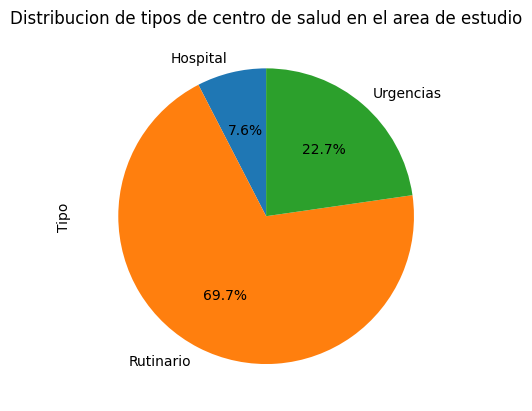

In [12]:
salud.groupby('Tipo').Tipo.count().plot(kind = 'pie',legend=False, autopct='%1.1f%%', 
    startangle=90, title = 'Distribucion de tipos de centro de salud en el area de estudio')
plt.show()

Se puede notar una clara predominancia de centros de salud rutinarios, y a su vez una muy baja cantidad de Hospitales, teniendo en cuenta la distribucion de centros de atencion, para medir la importancia relativa por cada grupo de edad a cada tipo de centro, ajustaremos los datos a una medida que indique la escala de 0 a 1 la necesidad de cada persona a cada tipo de establecimiento

In [13]:
data4 = data3.groupby('Tipo').mean().reset_index().drop(['Anio','Total'],axis = 1).copy()

dist_tipos = (('Hospital',0.076), ('Rutinario',0.697), ('Urgencias',0.227))
for tipo, valor in dist_tipos:
    for edad in ['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64']:
        data4.loc[data4.Tipo == tipo, edad] /= valor
        
total = sum(data4[['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64']].sum())

for tipo, valor in dist_tipos:
    for edad in ['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64']:
        data4.loc[data4.Tipo == tipo, edad] /=total
data4

,Tipo,Edad<5,Edad5-14,Edad15-64,Edad>64
0,Hospital,0.197425,0.107165,0.092042,0.223308
1,Rutinario,0.066231,0.022674,0.024355,0.064829
2,Urgencias,0.079724,0.044344,0.034185,0.043717


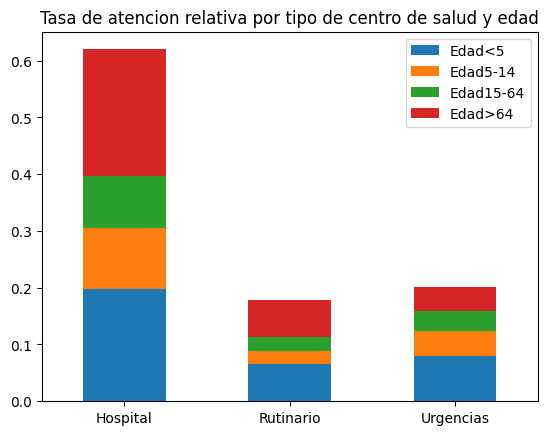

In [14]:
fig, ax = plt.subplots()
data4.groupby('Tipo').sum().reset_index().plot(ax = ax,x = 'Tipo', 
    y = ['Edad<5','Edad5-14','Edad15-64','Edad>64'], kind ='bar', stacked = True, rot=0,
    title = 'Tasa de atencion relativa por tipo de centro de salud y edad')
plt.xlabel("")
plt.show()

In [15]:
data5 =data4.copy()
for tipo, valor in dist_tipos:
    for edad in ['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64']:
        data5.loc[data5.Tipo == tipo, edad] = 1/data5.loc[data5.Tipo == tipo, edad]
        
total = sum(data5[['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64']].sum())
for tipo, valor in dist_tipos:
    for edad in ['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64']:
        data5.loc[data5.Tipo == tipo, edad] =(data5.loc[data5.Tipo == tipo, edad]/total)
print(data5[['Edad<5', 'Edad5-14', 'Edad15-64', 'Edad>64']].sum().sum())
data5

1.0


,Tipo,Edad<5,Edad5-14,Edad15-64,Edad>64
0,Hospital,0.021772,0.040110,0.046700,0.019249
1,Rutinario,0.064900,0.189573,0.176485,0.066303
2,Urgencias,0.053916,0.096933,0.125737,0.098322


In [16]:
data5.to_csv('input/input_modelo_factores_2.csv', index = False)

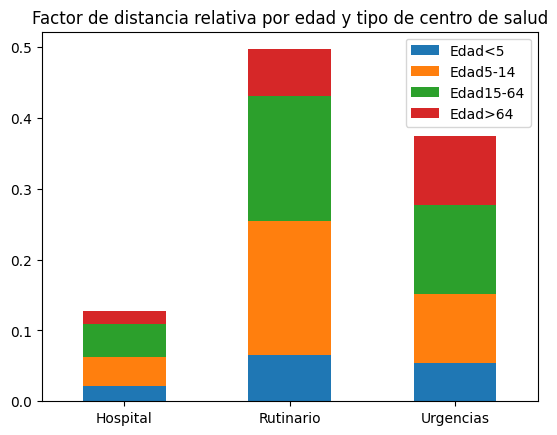

In [17]:
fig, ax = plt.subplots()
data5.groupby('Tipo').sum().reset_index().plot(ax = ax,x = 'Tipo', 
    y = ['Edad<5','Edad5-14','Edad15-64','Edad>64'], kind ='bar', stacked = True, rot=0,
    title = 'Factor de distancia relativa por edad y tipo de centro de salud')
plt.xlabel("")
plt.show()